In [22]:
import pandas as pd
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# importer la base de données
db =pd.read_csv('dataForRegression.csv', sep=";" ,encoding = "ISO-8859-1")
db=db.drop(['Température Sèche Air Extérieur'],axis=1)
db_Meteo =pd.read_csv('Meteo2002.csv', sep=";" ,encoding = "ISO-8859-1")
db=db.stack().str.replace(',','.').unstack()
db_Meteo=db_Meteo.stack().str.replace(',','.').unstack()
db1=pd.merge(db_Meteo,db, on='Date/Heure')

db1=db1.drop(['Date/Heure'],axis=1)
db_date=db['Date/Heure']
db1=db1.iloc[1:]
db1.iloc[:,:] = db1.iloc[:,:].astype(float)

# periode avril octobre
#db1=db1[2200:6600]

# préparation de la base de données
target="Température d'air"
db=db1.iloc[:,[0,1,2,3,4,5,13,15,21,24]]

x=db.drop([target],axis=1).values
#x=db.values
y=db[target].values


# Create train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

IndexError: positional indexers are out-of-bounds

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2

model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', 
                        restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000
206/206 - 1s - loss: 297.3480 - val_loss: 53.4630
Epoch 2/1000
206/206 - 0s - loss: 45.6638 - val_loss: 41.6199
Epoch 3/1000
206/206 - 0s - loss: 36.2199 - val_loss: 31.7842
Epoch 4/1000
206/206 - 0s - loss: 29.6370 - val_loss: 28.7684
Epoch 5/1000
206/206 - 0s - loss: 26.9446 - val_loss: 26.8114
Epoch 6/1000
206/206 - 0s - loss: 24.8723 - val_loss: 24.3585
Epoch 7/1000
206/206 - 0s - loss: 23.0228 - val_loss: 22.2433
Epoch 8/1000
206/206 - 0s - loss: 20.8261 - val_loss: 20.4032
Epoch 9/1000
206/206 - 0s - loss: 19.0429 - val_loss: 18.4403
Epoch 10/1000
206/206 - 0s - loss: 17.2787 - val_loss: 16.3222
Epoch 11/1000
206/206 - 0s - loss: 14.6959 - val_loss: 14.5373
Epoch 12/1000
206/206 - 0s - loss: 12.7103 - val_loss: 12.8845
Epoch 13/1000
206/206 - 0s - loss: 12.2029 - val_loss: 10.4184
Epoch 14/1000
206/206 - 0s - loss: 10.6282 - val_loss: 10.6671
Epoch 15/1000
206/206 - 0s - loss: 10.2858 - val_loss: 10.4641
Epoch 16/1000
206/206 - 0s - loss: 10.1188 - val_loss: 9.1994
E

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 25)                250       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________


In [14]:
from sklearn import metrics

# Predict
pred = model.predict(x_test)

# Measure MSE error.  
score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

Final score (MSE): 8.006715174563915


In [15]:
import numpy as np

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 2.8296139621093044


In [16]:
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

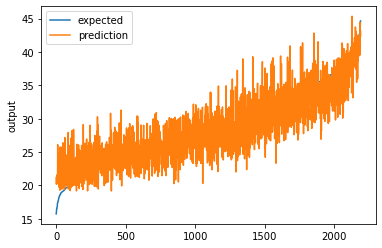

In [17]:

# Plot the chart
chart_regression(pred.flatten(),y_test)

In [18]:
y_test

array([25.06497, 37.27454, 33.18601, ..., 29.28805, 29.45969, 28.20205])

In [19]:
pred

array([[24.712898],
       [36.34169 ],
       [34.620693],
       ...,
       [29.882076],
       [30.348085],
       [29.593216]], dtype=float32)

In [20]:
y.flatten()

array([19.86205, 19.47397, 19.22589, ..., 23.37062, 22.86883, 22.44188])

In [21]:
pred.flatten()

array([24.712898, 36.34169 , 34.620693, ..., 29.882076, 30.348085,
       29.593216], dtype=float32)